In [1]:
from qaravan.core import *
from qaravan.tensorQ import *

In [2]:
def kicked_ising_circ(nq, nl, x_angle):
    sk = brickwall_skeleton(nq, 1)
    circ = rzz_layer(sk, [np.pi/4]*(nq-1)) + rx_layer(nq, [x_angle]*nq)
    return circ * nl


t1 = 28#280
t2 = 18#180
one_qubit_time = 60/1000
two_qubit_time = 460/1000
eagle_nm = QubitNoise(t1, t2, one_qubit_time, two_qubit_time)

nq = 4 
nl = nq 
x_angles = np.linspace(0, 2*np.pi, 20)
exact_exps = []
noisy_exps = []

for angle in x_angles:
    circ = kicked_ising_circ(nq, nl, angle)
    init_state = '0'*nq 
    sim = StatevectorSim(circ, init_state=init_state)
    exact_exps.append(sim.one_local_expectation(pauli_Z, nq//2-1))

    noisy_sim = DensityMatrixSim(circ, init_state=init_state, nm=eagle_nm)
    noisy_exps.append(noisy_sim.one_local_expectation(pauli_Z, nq//2-1))

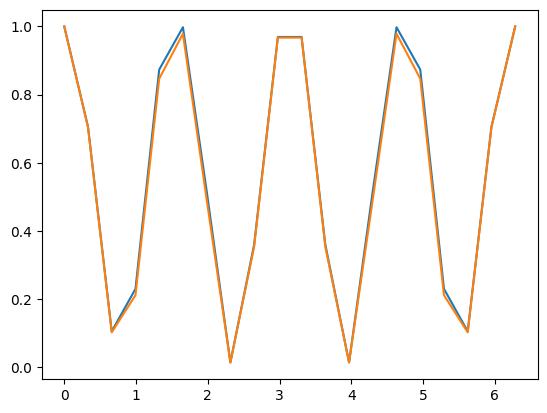

In [3]:
import matplotlib.pyplot as plt
plt.plot(x_angles, exact_exps, label='Exact')
plt.plot(x_angles, noisy_exps, label='Noisy')
